**Author:**  Gurjeet Singh  <br>**Date:** 2/19/2021

----

## Introduction

The purpose of this project is to develop a machine learning model to help the client's purchasing group who wants to expand their candy offering. These would be store-brand candies that we sell along with the brand offerings. 

The idea is to create a brand new product. The Divisional Director responsible for purchasing has decided to use a more data-driven approach. He contracted with a market research group to collect data on products in the market and their characteristics and customer sentiment. 

Our goal is to find out which product characteristics drive customer sentiment and subsequently make a recommendation on a new product.

## Data Exploration

The first step in any machine learning project is to explore the data that you will use to train a model. The goal of this exploration is to try to understand the relationships between its attributes; in particular, any apparent correlation between the features and the label your model will try to predict.

Let's start by loading the packages, create any user-defined functions, and viewing the first few rows.

> ### Load Packages and Set Options

Below are all the packages used in this projects to analyze data and create machine learning models.

In [2]:
# Load all libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error as MSE, r2_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, GradientBoostingRegressor
from tabulate import tabulate
import statsmodels.api as sm

# setting options
pd.set_option('max_columns',None)
sns.set_style(style="darkgrid")
plt.rcParams["figure.figsize"] = (10,10)

print("Packages are loaded")

Packages are loaded


> ### User-Defined Functions

Creating custom user-defined functions to use for plotting.

In [3]:
# Function for histogram - univariate analysis
def histogram(axes, axC, data, col):
    sns.histplot(ax=axes[axC],data=data[col], kde=True, bins=30)
    axes[axC].set_xlabel(col.capitalize())
    axes[axC].set_ylabel("Frequency")
    axes[axC].axvline(data[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
    axes[axC].axvline(data[col].median(), color='cyan', linestyle='dashed', linewidth=2)

# Function for histogram - bivariate analysis
def histogramMulti(axes, axR, axC, data, col):
    sns.histplot(ax=axes[axR,axC],data=data[col], kde=True, bins=30)
    axes[axR,axC].set_xlabel(col.capitalize())
    axes[axR,axC].set_ylabel("Frequency")
    axes[axR,axC].axvline(data[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
    axes[axR,axC].axvline(data[col].median(), color='cyan', linestyle='dashed', linewidth=2)

# Function for boxplot - univariate analysis
def boxplot(axes, axC, data, col):
    sns.boxplot(ax=axes[axC],data=data, x=col, palette="Set3")
    axes[axC].set_xlabel(col.capitalize())

# Function for boxplot - bivariate analysis
def boxplotMulti(axes, axR, axC, data, colX, colY):
    sns.boxplot(ax=axes[axR,axC],data=data, x=colX, y=colY)
    axes[axR,axC].set_xlabel(colX.capitalize())
    axes[axR,axC].set_ylabel(colY.capitalize())

# Function for barplot - bivariate analysis
def barplotMulti(axes, axR, axC, data, colX, colY):
    sns.barplot(ax=axes[axR,axC],data=data, x=colX, y=colY, ci=None)
    axes[axR,axC].set_xlabel(colX.capitalize())
    axes[axR,axC].set_ylabel("Frequency")

# Function for feature importance barplot
def plot_feature_importance(importance,names,model_name):
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title(model_name + 'Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')
    
print("Functions are created")

Functions are created


> ### Data Review

Loading all the data and viewing the first 5 rows.

In [4]:
df = pd.read_csv("candy-data.txt")
# print(tabulate(df.head(),headers=df.columns,tablefmt="fancy_grid"))
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


The data consists of the following columns:

- **competitorname**: Name of the competition
- **chocolate**: Does it contain chocolate?
- **fruity**: Is it fruit flavored?
- **caramel**: Is there caramel in the candy?
- **peanutalmondy**: Does it contain peanuts, peanut butter or almonds?
- **nougat**: Does it contain nougat?
- **crispedricewafer**: Does it contain crisped rice, wafers, or a cookie component?
- **hard**: Is it a hard candy?
- **bar**: Is it a candy bar?
- **pluribus**: Is it one of many candies in a bag or box?
- **sugarpercent**: The percentile of sugar it falls under within the data set.
- **pricepercent**: The unit price percentile compared to the rest of the set.
- **winpercent**: The overall win percentage according to 269,000 matchups.

In this dataset, **winpercent** represents the label (the *y* value) our model must be trained to predict. The other columns are potential features (*x* values).

Below are the top 15 competitors. The data reveals that Reese Peanut Butter Cup is the most preferred amount the customers based on the ranking.

In [5]:
#Top 15 Competitor by Winpercent
df.sort_values(by=['winpercent'], ascending=False).head(15)


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
53,ReeseÕs pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
36,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556
54,ReeseÕs stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
32,Peanut butter M&MÕs,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641


The graphical representation of the top 15 competitors by winpercent.

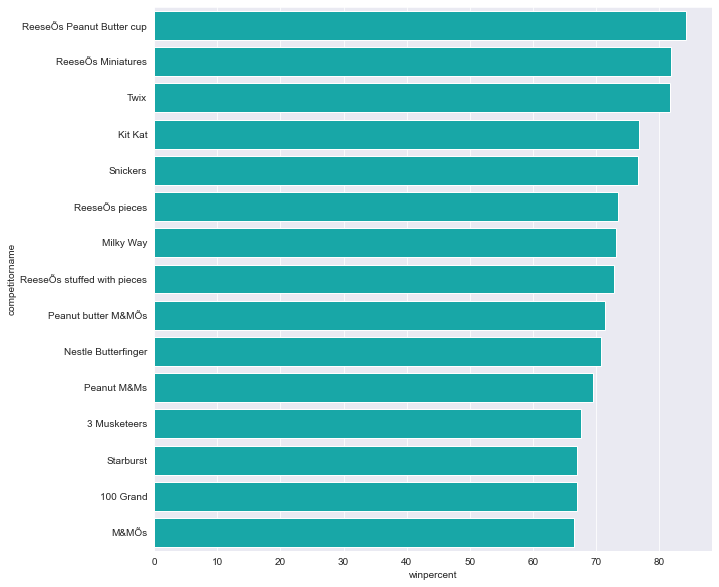

In [6]:
#Top 15 Competitor by Winpercent
sns.barplot(data=df, y="competitorname", x="winpercent",
            order=df.sort_values(by='winpercent',
                                 ascending=False).competitorname.head(15), color="c")
plt.show()

We use the describe function to examine a few key descriptive statistics.

In [7]:
#Headers row based
# print(tabulate(df.describe(include='all').T, headers=df.describe(include='all').index, tablefmt="fancy_grid"))
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
competitorname,85,85,Nik L Nip,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chocolate,85,NaN,NaN,NaN,0.435294,0.498738,0,0,0,1,1
fruity,85,NaN,NaN,NaN,0.447059,0.50014,0,0,0,1,1
caramel,85,NaN,NaN,NaN,0.164706,0.373116,0,0,0,0,1
peanutyalmondy,85,NaN,NaN,NaN,0.164706,0.373116,0,0,0,0,1
nougat,85,NaN,NaN,NaN,0.0823529,0.276533,0,0,0,0,1
crispedricewafer,85,NaN,NaN,NaN,0.0823529,0.276533,0,0,0,0,1
hard,85,NaN,NaN,NaN,0.176471,0.383482,0,0,0,0,1
bar,85,NaN,NaN,NaN,0.247059,0.433861,0,0,0,0,1
pluribus,85,NaN,NaN,NaN,0.517647,0.502654,0,0,1,1,1


The statistics reveal some information about the distribution of the data in each of the numeric fields, including that the number of observations (there are 85 records), the mean, standard deviation, minimum and maximum values, and the quartile values. The threshold value for 50% is also the median value. 

From this, we see that there are no missing values. We see that the mean of **winpercent** is around 50.31; but there's a comparatively smaller standard deviation, which may be indicating a lot less variance in the winpercent. The winpercent looks a little skewed, indicating some outliers, but not a lot that we need to clean. The data is also not on the same scale, therefore, we will perform transformation during model development.

We might get a clearer idea of the distribution of winpercent by visualizing the data. Below are two plots, histogram and box plot, showing the distribution of winpercent.

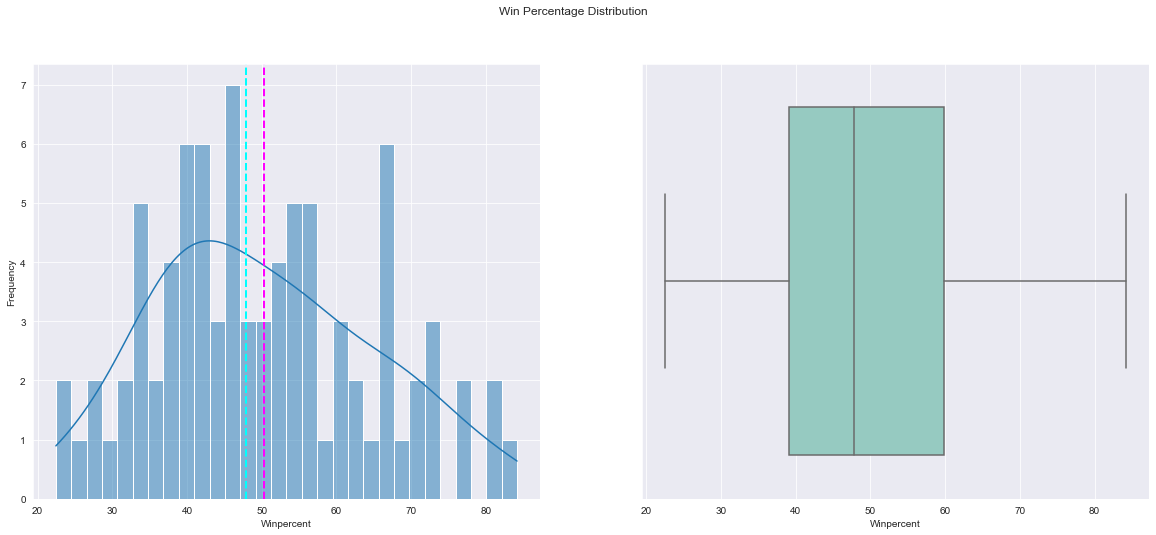

In [8]:
#------------------------------------------------------
# Distribution - Winpercent
#------------------------------------------------------
# Create a figure for 2 subplots (1 rows, 2 column)
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=False)

# Add a title to the Figure
fig.suptitle("Win Percentage Distribution")

# Plot the histogram
histogram(axes,0,df, "winpercent")

# Plot the boxplot
boxplot(axes,1,df,"winpercent")

# Show the figure
# fig.show()


The histogram shows that the target variable is normally distributed with slight right-skewness, indicating data is not symmetrical. The plots show that the winpercent ranges from 25 to 85 percent. However, the mean and the median are around 50 percent. The box plot does not show any outliers and all data points are within the range. 

Now, let's see the distribution of other features.

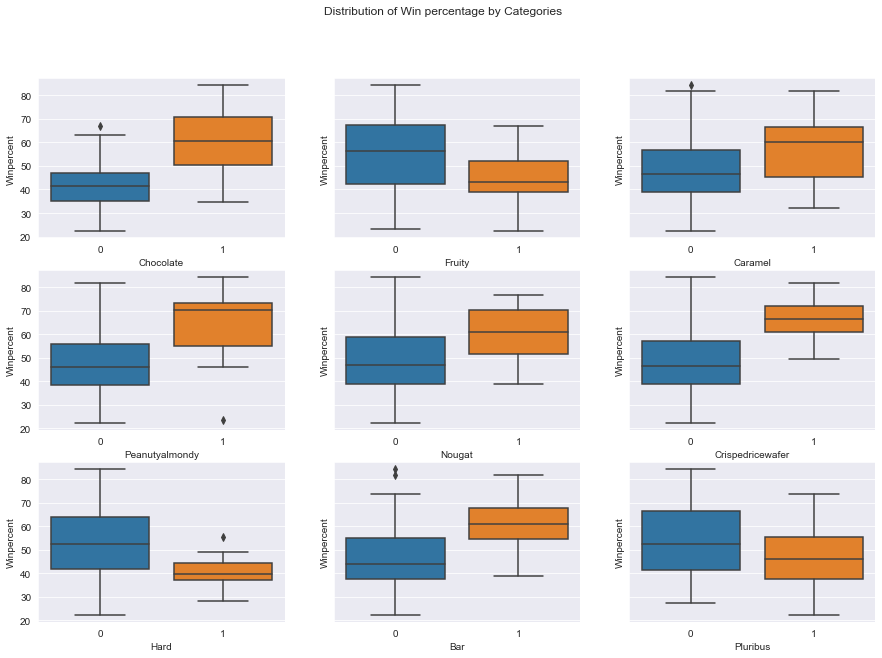

In [9]:
#------------------------------------------------------
# Distribution - Categorical variables (Boxplot)
#------------------------------------------------------

# Create a figure for 9 subplots (3 rows, 3 column)
fig, axes = plt.subplots(3, 3, figsize=(15, 10), sharey=True)
fig.suptitle("Distribution of Win percentage by Categories")

# listing all categorical variables
categorical_variables = ['chocolate','fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard','bar','pluribus']

# temp variable for loop
i=0;j=0

# Plot the boxplot
for col in categorical_variables:
    if i==0 and j<3:
        boxplotMulti(axes,i,j,df,col, "winpercent")
        j=j+1
    elif i==0 and j>=3 and j<6:
        boxplotMulti(axes, i+1, j-3, df, col, "winpercent")
        j = j + 1
    elif i==0 and j>=6 and j<9:
        boxplotMulti(axes, i+2, j-6, df, col, "winpercent")
        j = j + 1

# Show the figure
# fig.show()


The plot shows the following:
- More people prefer Chocolate
- Fruit flavored are not very popular
- People prefer non-caramel candy
- Candy with peanuts, peanut butter, or almonds are more desired
- Nougat candies are more preferred than the non-nougat
- People like candy with crisped rice, wafers, or a cookie component
- Bar candy is preferred over a hard one.

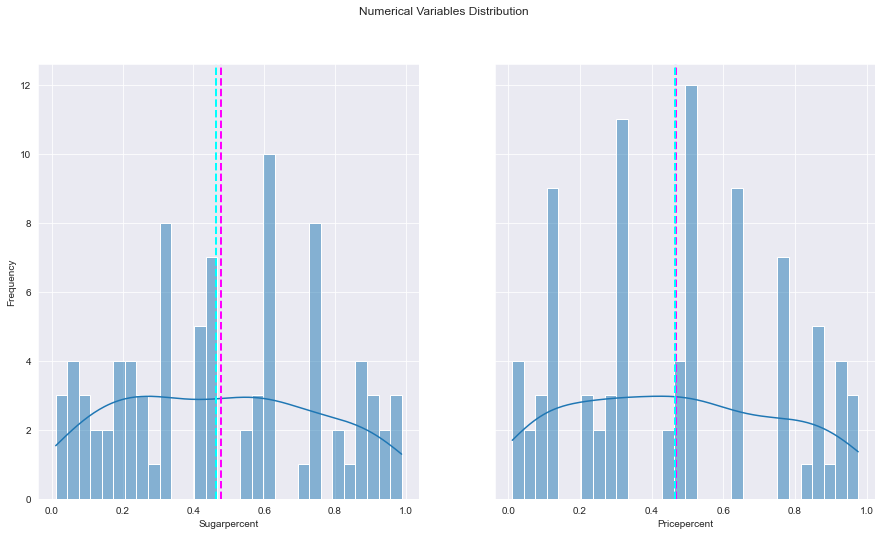

In [10]:
#------------------------------------------------------
# Distribution - numerical variables (histogram)
#------------------------------------------------------

# Create a figure for 2 subplots (1 rows, 2 column)
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

# Add a title to the Figure
fig.suptitle("Numerical Variables Distribution")

# Plot the histogram for sugarpercent
histogram(axes, 0, df, "sugarpercent")

# Plot the histogram for pricepercent
histogram(axes, 1, df, "pricepercent")

# Show the figure
# fig.show()

The plot shows sugarpercent and pricepercent is normally distributed.

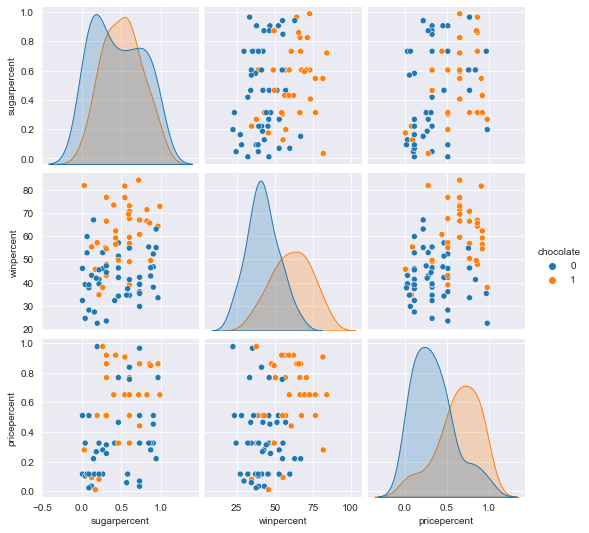

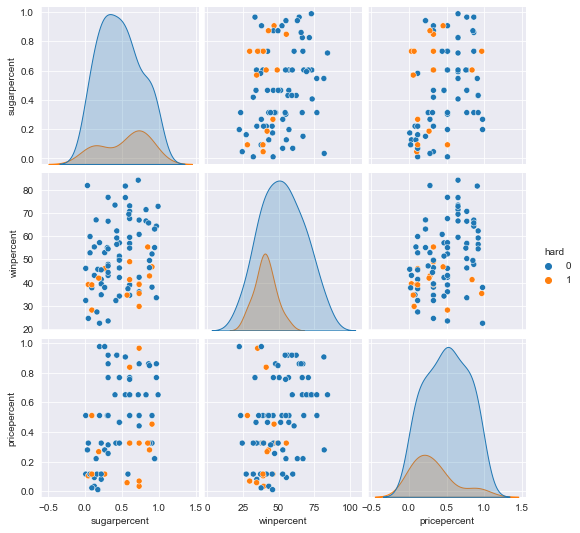

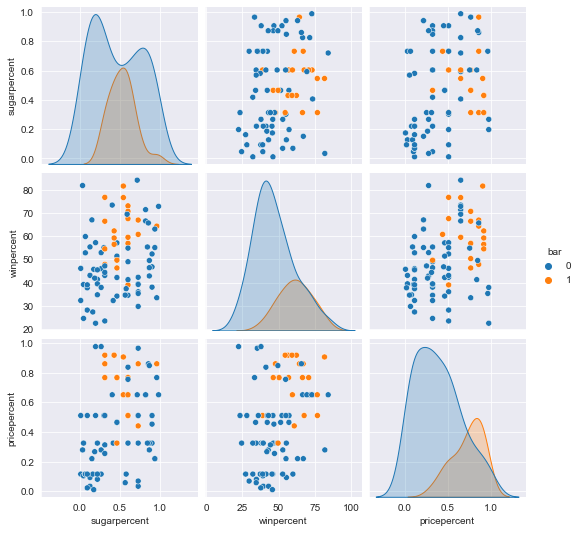

In [11]:
#------------------------------------------------------
# Relationships - Scatter plots
#------------------------------------------------------

sns.pairplot(df[["sugarpercent", "winpercent", "pricepercent", "chocolate"]], hue="chocolate")
sns.pairplot(df[["sugarpercent", "winpercent", "pricepercent", "hard"]], hue="hard")
sns.pairplot(df[["sugarpercent", "winpercent", "pricepercent", "bar"]], hue="bar")
plt.show()

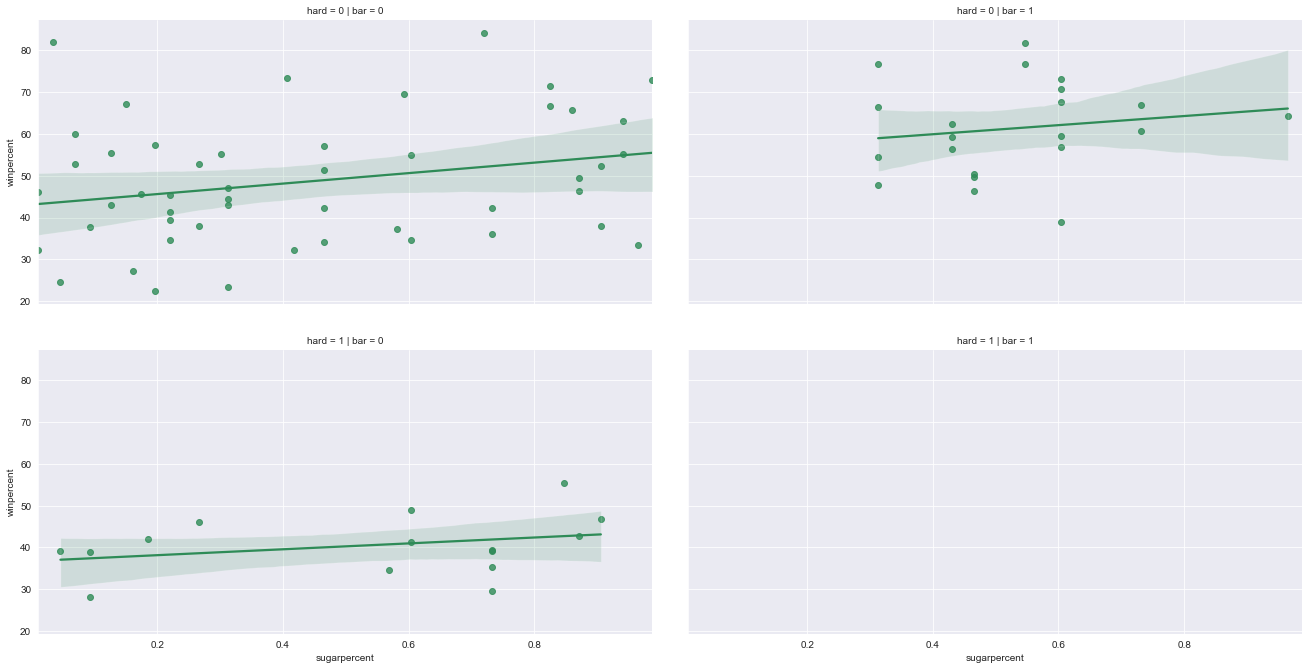

In [12]:
#------------------------------------------------------
# Relationships - Scatter plots
#------------------------------------------------------

# # plot a scatter plot to understand sugerpercent on hard and bar
g = sns.FacetGrid(data=df, row="hard", col="bar")
g.map(sns.regplot, "sugarpercent", "winpercent", color="seagreen" )
g.fig.set_size_inches(20,10)

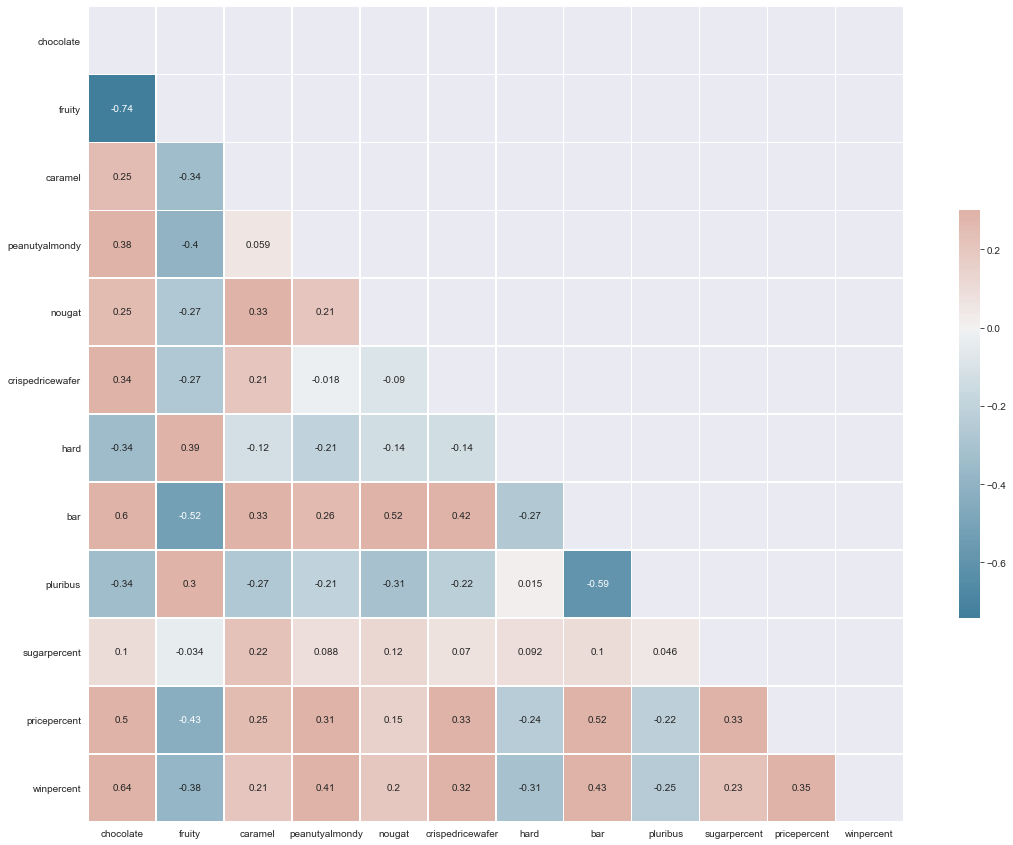

In [13]:
#-----------------------------------------------------------
# Coefficient of Correlation - Pearson correlation of coef.
#-----------------------------------------------------------

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

## Model Development

It is best practice to split the data into training and test sets. The training set is used to train the model, and the test set is used to validate the trained model. Below we are using the scikit-learn library's train_test_split function to split our dataset.

In [310]:
#-----------------------------------------------------------
# Split data into train, test set
#-----------------------------------------------------------
# remove target and name column
drop = ['winpercent', 'competitorname']

# Save predictor variables
X = df.drop(drop, axis=1).values

# Save target variable
y = df['winpercent'].values

# Split the data into train, text sets using 80/20 split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

print('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

# Get the names of the predictor variables
names = df.drop(drop, axis=1).columns


Training Set: 68 rows
Test Set: 17 rows


We have the following four datasets:

- **X_train**: The feature values we'll use to train the model
- **y_train**: The corresponding labels we'll use to train the model
- **X_test**: The feature values we'll use to validate the model
- **y_test**: The corresponding labels we'll use to validate the model

> ### Model 1: Linear Regression

In [311]:
#-----------------------------------------------------------
# Model 1: Linear Regression
#-----------------------------------------------------------

# Linear Regression - Train the model
sm_OLS = sm.OLS(y_train, sm.add_constant(X_train))
sm_results = sm_OLS.fit()

# Print the summary of the model
print(sm_results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     6.336
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           1.11e-06
Time:                        00:37:45   Log-Likelihood:                -252.25
No. Observations:                  68   AIC:                             528.5
Df Residuals:                      56   BIC:                             555.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.6940      4.762      7.706      0.0

In [312]:
# Get the coefficient values
sm_coef = sm_results.params[1:len(sm_results.params)]

# Get the training set predictions
sm_yPred_train = sm_results.predict(sm.add_constant(X_train))

# Get the prediction
sm_yPred = sm_results.predict(sm.add_constant(X_test))

# print actual vs prediction values
print('Predicted winpercent: ', np.round(sm_yPred[:8],2))
print('Actual winpercent: ', np.round(y_test[:8],2))

Predicted winpercent:  [58.79 60.35 40.65 53.66 45.01 38.66 40.21 46.69]
Actual winpercent:  [65.72 60.8  55.35 57.22 47.17 39.01 22.45 41.39]


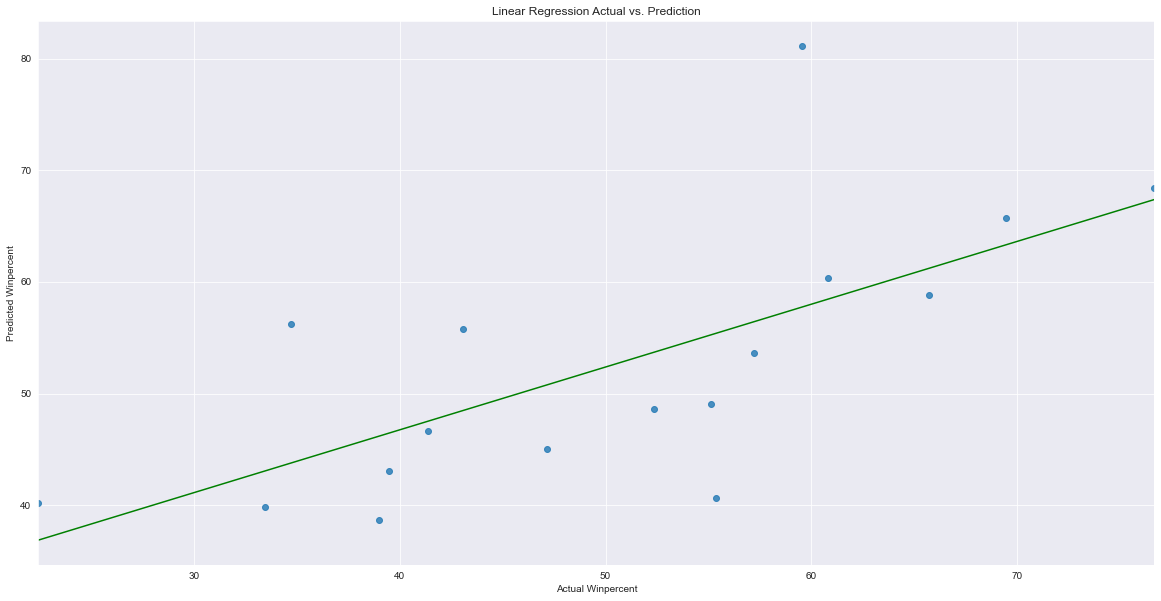

In [313]:
#compare using scatter plot
sns.regplot(x=y_test, y=sm_yPred, ci=None, marker="o", line_kws={"color": "g", "linewidth" :1.5})
plt.xlabel('Actual Winpercent')
plt.ylabel('Predicted Winpercent')
plt.title('Linear Regression Actual vs. Prediction')
plt.rcParams["figure.figsize"] = (20,12)

In [314]:
#compute metrics
# MSE
mse_sm_train = MSE(y_train, sm_yPred_train)
mse_sm = MSE(y_test, sm_yPred)

# RMSE
rsme_sm_train = np.sqrt(mse_sm_train)
rsme_sm = np.sqrt(mse_sm)

# R-Squared
R2_sm_train = r2_score(y_train, sm_yPred_train)
R2_sm = r2_score(y_test, sm_yPred)

# Create a result table using pandas dataframe
metrics_sm = pd.DataFrame(columns=('Type', 'Train_Value', 'Test_value'))

# Adding metric values
metrics_sm.loc[0] = ['MSE', np.round(mse_sm_train,2), np.round(mse_sm,2)]
metrics_sm.loc[1] = ['RMSE', np.round(rsme_sm_train,2),np.round(rsme_sm,2)]
metrics_sm.loc[2] = ['R-Squared', np.round(R2_sm_train,2), np.round(R2_sm,2)]

# Print the results
print(tabulate(metrics_sm, headers=metrics_sm.columns, tablefmt="fancy_grid"))
# metrics_sm.head()

╒════╤═══════════╤═══════════════╤══════════════╕
│    │ Type      │   Train_Value │   Test_value │
╞════╪═══════════╪═══════════════╪══════════════╡
│  0 │ MSE       │         97.63 │       112    │
├────┼───────────┼───────────────┼──────────────┤
│  1 │ RMSE      │          9.88 │        10.58 │
├────┼───────────┼───────────────┼──────────────┤
│  2 │ R-Squared │          0.55 │         0.42 │
╘════╧═══════════╧═══════════════╧══════════════╛


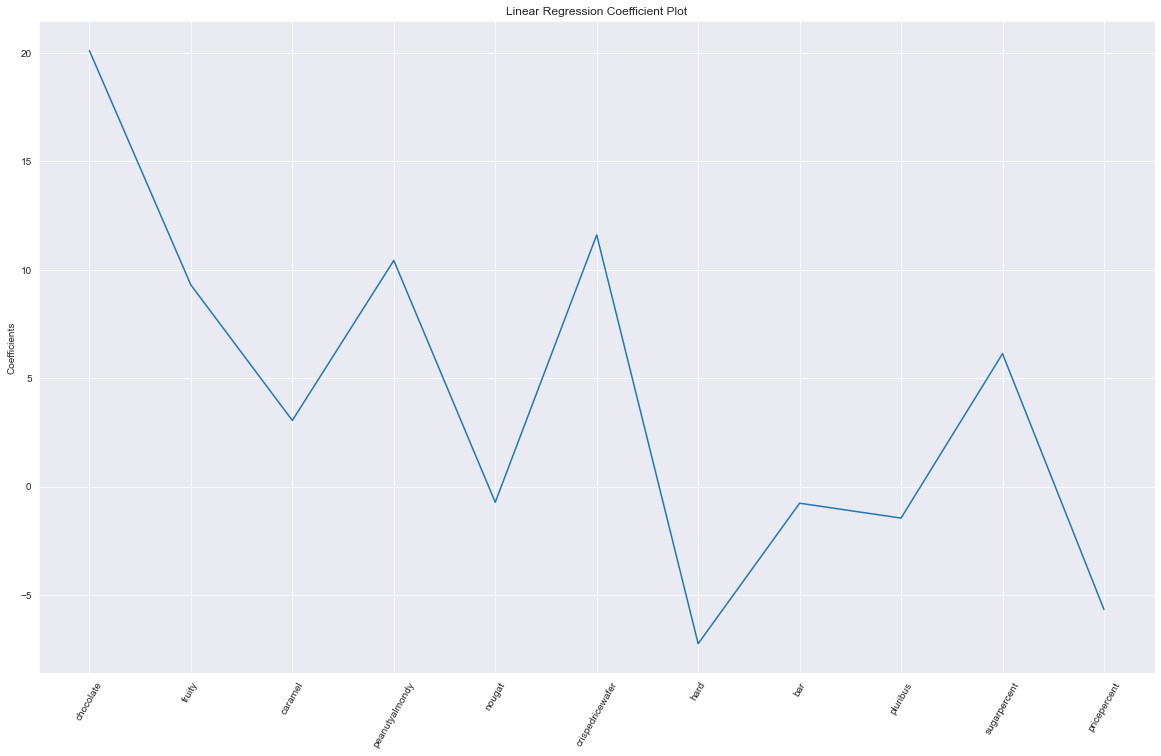

In [315]:
#plot coefficients
sns.lineplot(x=range(len(names)), y=sm_coef)
plt.xticks(range(len(names)),  names, rotation=60)
plt.ylabel('Coefficients')
plt.title("Linear Regression Coefficient Plot")
plt.rcParams["figure.figsize"] = (15,10)
plt.show()

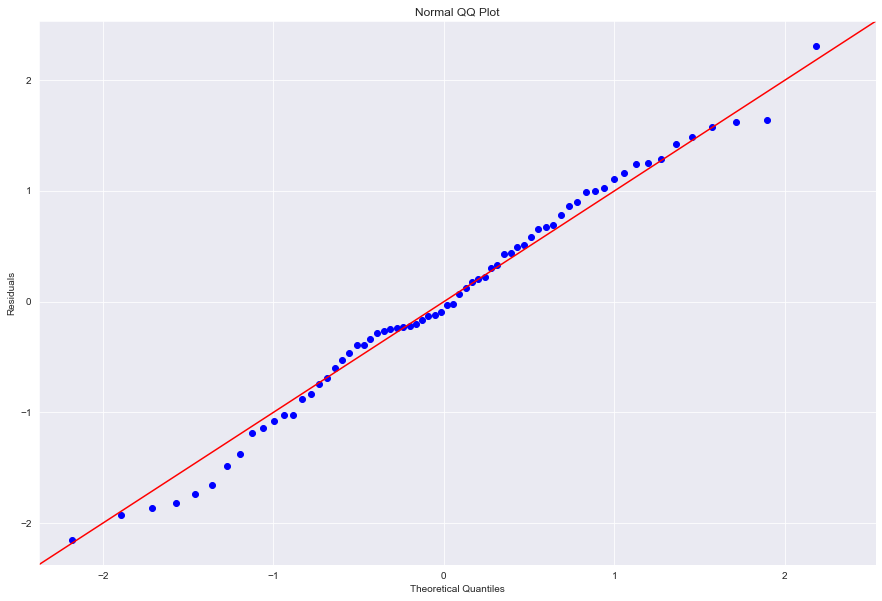

In [316]:
#get the residuals
sm_res = sm_results.resid
sm.qqplot(sm_res, fit=True, line="45")
plt.ylabel('Residuals')
plt.title("Normal QQ Plot")
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

> ### Model 2: Ridge Regression

In [317]:
#-----------------------------------------------------------
# Model 2: Ridge Regression
#-----------------------------------------------------------
# Ridge Regression
ridge = Ridge(alpha=0.1, normalize=True)
ridge_results = ridge.fit(X_train, y_train)

# Get the training set predictions
ridge_Ypred_train = ridge.predict(X_train)

# Get the prediction - Test
ridge_Ypred = ridge.predict(X_test)

# print actual vs prediction values
print('Predicted winpercent: ', np.round(ridge_Ypred[:8],2))
print('Actual winpercent: ', np.round(y_test[:8],2))

Predicted winpercent:  [58.08 59.11 40.88 53.04 44.51 38.44 41.64 45.69]
Actual winpercent:  [65.72 60.8  55.35 57.22 47.17 39.01 22.45 41.39]


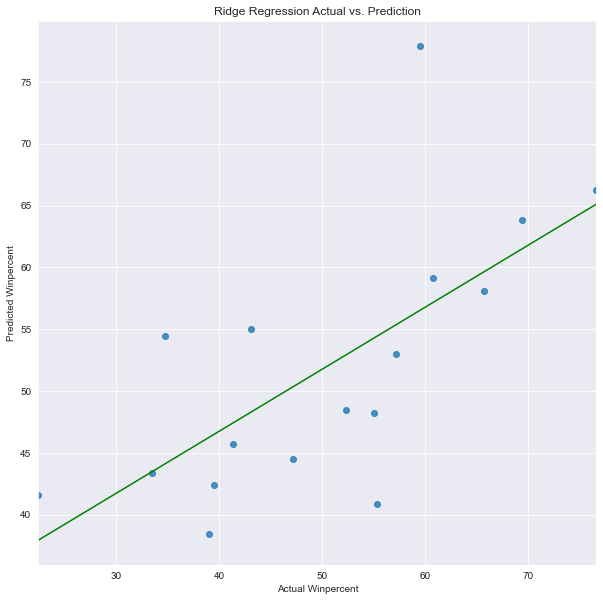

In [318]:
#compare using scatter plot
sns.regplot(x=y_test, y=ridge_Ypred, ci=None, marker="o", line_kws={"color": "g", "linewidth" :1.5})
plt.xlabel('Actual Winpercent')
plt.ylabel('Predicted Winpercent')
plt.title('Ridge Regression Actual vs. Prediction')
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

In [319]:
#-----------------------
#compute metrics - Test
#-----------------------
# MSE
mse_ridge_train = MSE(y_train, ridge_Ypred_train)
mse_ridge = MSE(y_test, ridge_Ypred)

# RMSE
rsme_ridge_train = np.sqrt(mse_ridge_train)
rsme_ridge = np.sqrt(mse_ridge)

# R-Squared
R2_ridge_train = r2_score(y_train, ridge_Ypred_train)
R2_ridge = r2_score(y_test, ridge_Ypred)

# Create a result table using pandas dataframe
metrics_ridge = pd.DataFrame(columns=('Type', 'Train_Value', 'Test_value'))

# Adding metric values
metrics_ridge.loc[0] = ['MSE', np.round(mse_ridge_train,2), np.round(mse_ridge,2)]
metrics_ridge.loc[1] = ['RMSE', np.round(rsme_ridge_train,2),np.round(rsme_ridge,2)]
metrics_ridge.loc[2] = ['R-Squared', np.round(R2_ridge_train,2), np.round(R2_ridge,2)]

# Print the results
print(tabulate(metrics_ridge, headers=metrics_ridge.columns, tablefmt="fancy_grid"))


╒════╤═══════════╤═══════════════╤══════════════╕
│    │ Type      │   Train_Value │   Test_value │
╞════╪═══════════╪═══════════════╪══════════════╡
│  0 │ MSE       │        100.34 │       109.6  │
├────┼───────────┼───────────────┼──────────────┤
│  1 │ RMSE      │         10.02 │        10.47 │
├────┼───────────┼───────────────┼──────────────┤
│  2 │ R-Squared │          0.54 │         0.43 │
╘════╧═══════════╧═══════════════╧══════════════╛


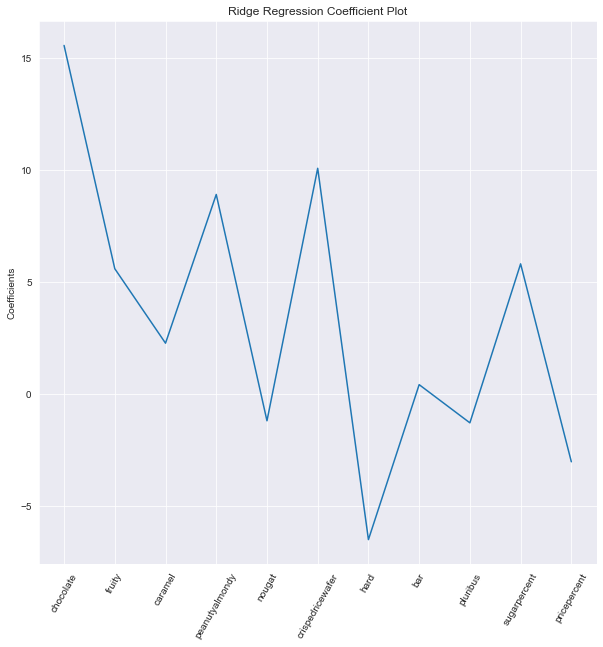

In [320]:
# Get the coefficient values
ridge_coef = ridge_results.coef_

#plot coefficients
sns.lineplot(x=range(len(names)), y=ridge_coef)
plt.xticks(range(len(names)),  names, rotation=60)
plt.ylabel('Coefficients')
plt.title("Ridge Regression Coefficient Plot")
plt.rcParams["figure.figsize"] = (15,10)
plt.show()

> ### Model 3: Lasso Regression

In [321]:
#-----------------------------------------------------------
# Model 3: Lasso Regression
#-----------------------------------------------------------

# Lasso Regression
lasso = Lasso(alpha=0.1, normalize=True)
lassso_results = lasso.fit(X_train, y_train)

# Get the training set predictions
lasso_Ypred_train = lassso_results.predict(X_train)

# Get the prediction
lasso_Ypred = lassso_results.predict(X_test)

# print actual vs prediction values
print('Predicted winpercent: ', np.round(lasso_Ypred[:8],2))
print('Actual winpercent: ', np.round(y_test[:8],2))


Predicted winpercent:  [58.4  58.07 41.13 56.68 43.66 39.17 43.36 43.42]
Actual winpercent:  [65.72 60.8  55.35 57.22 47.17 39.01 22.45 41.39]


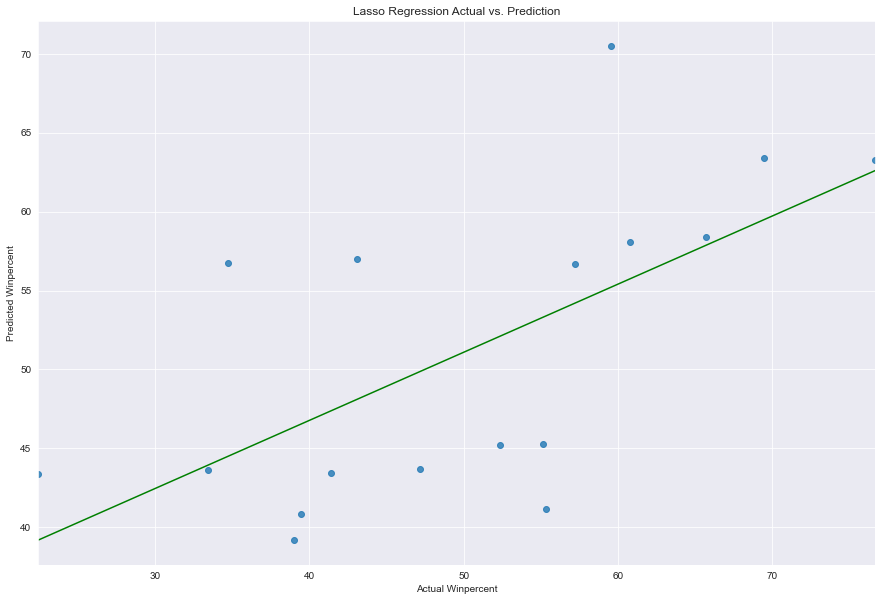

In [322]:
#compare using scatter plot
sns.regplot(x=y_test, y=lasso_Ypred, ci=None, marker="o", line_kws={"color": "g", "linewidth" :1.5})
plt.xlabel('Actual Winpercent')
plt.ylabel('Predicted Winpercent')
plt.title('Lasso Regression Actual vs. Prediction')
plt.show()

In [323]:
#-----------------------
#compute metrics
#-----------------------
# MSE
mse_lasso_train = MSE(y_train, lasso_Ypred_train)
mse_lasso = MSE(y_test, lasso_Ypred)

# RMSE
rsme_lasso_train = np.sqrt(mse_lasso_train)
rsme_lasso = np.sqrt(mse_lasso)

# R-Squared
R2_lasso_train = r2_score(y_train, lasso_Ypred_train)
R2_lasso = r2_score(y_test, lasso_Ypred)

# Create a result table using pandas dataframe
metrics_lasso = pd.DataFrame(columns=('Type', 'Train_Value', 'Test_value'))

# Adding metric values
metrics_lasso.loc[0] = ['MSE', np.round(mse_lasso_train,2), np.round(mse_lasso,2)]
metrics_lasso.loc[1] = ['RMSE', np.round(rsme_lasso_train,2),np.round(rsme_lasso,2)]
metrics_lasso.loc[2] = ['R-Squared', np.round(R2_lasso_train,2), np.round(R2_lasso,2)]

# Print the results
print(tabulate(metrics_lasso, headers=metrics_lasso.columns, tablefmt="fancy_grid"))

╒════╤═══════════╤═══════════════╤══════════════╕
│    │ Type      │   Train_Value │   Test_value │
╞════╪═══════════╪═══════════════╪══════════════╡
│  0 │ MSE       │        108.23 │       116.78 │
├────┼───────────┼───────────────┼──────────────┤
│  1 │ RMSE      │         10.4  │        10.81 │
├────┼───────────┼───────────────┼──────────────┤
│  2 │ R-Squared │          0.51 │         0.4  │
╘════╧═══════════╧═══════════════╧══════════════╛


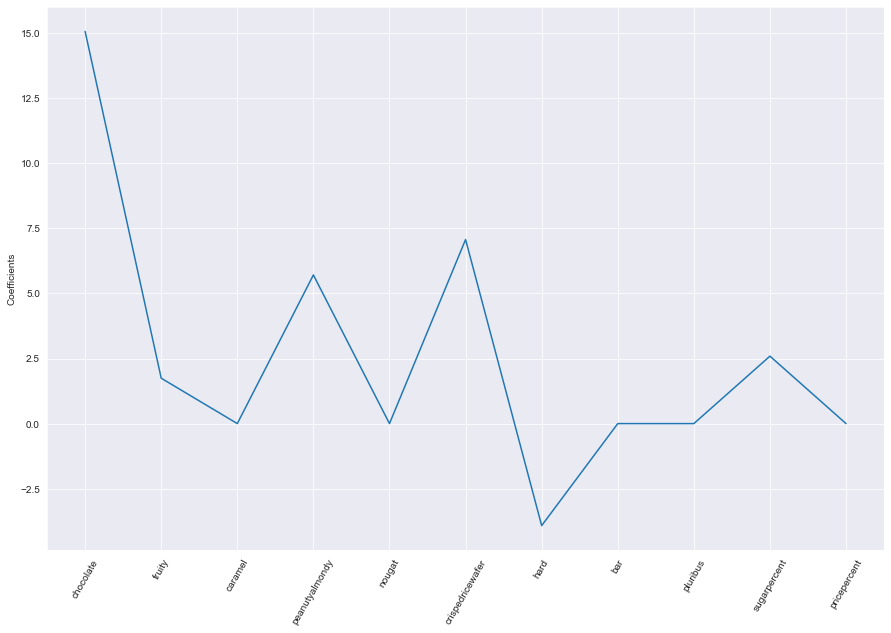

In [324]:
# Get the coefficient values
lasso_coef = lassso_results.coef_

#plot coefficients
plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation=60)
plt.ylabel('Coefficients')
plt.show()

> ### Model 4: Decision Tree

In [325]:
#-----------------------------------------------------------
# #Model 4 - Decision Tree
#-----------------------------------------------------------

# Decision Tree - train the model
dt = DecisionTreeRegressor(max_depth=4,
                           min_samples_leaf=0.14,
                           random_state=3)
dt_result = dt.fit(X_train, y_train)

# Get the training set predictions
dt_Ypred_Train = dt_result.predict(X_train)

# Get the prediction
dt_Ypred = dt.predict(X_test)

# print actual vs prediction values
print('Predicted winpercent: ', np.round(dt_Ypred[:8],2))
print('Actual winpercent: ', np.round(y_test[:8],2))


Predicted winpercent:  [65.28 65.28 41.29 58.2  46.85 46.85 41.29 46.85]
Actual winpercent:  [65.72 60.8  55.35 57.22 47.17 39.01 22.45 41.39]


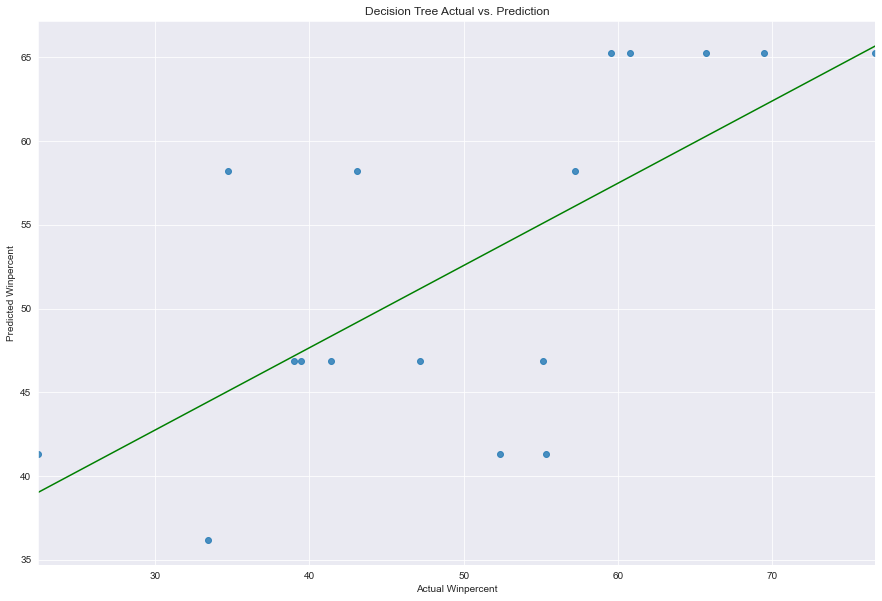

In [326]:
#compare using scatter plot
sns.regplot(x=y_test, y=dt_Ypred, ci=None, marker="o", line_kws={"color": "g", "linewidth" :1.5})
plt.xlabel('Actual Winpercent')
plt.ylabel('Predicted Winpercent')
plt.title('Decision Tree Actual vs. Prediction')
plt.show()

In [327]:
#-----------------------
#compute metrics
#-----------------------
# MSE
mse_dt_train = MSE(y_train, dt_Ypred_Train)
mse_dt = MSE(y_test, dt_Ypred)

# RMSE
rsme_dt_train = np.sqrt(mse_dt_train)
rsme_dt = np.sqrt(mse_dt)

# R-Squared
R2_dt_train = r2_score(y_train, dt_Ypred_Train)
R2_dt = r2_score(y_test, dt_Ypred)

# Create a result table using pandas dataframe
metrics_dt = pd.DataFrame(columns=('Type', 'Train_Value', 'Test_value'))

# Adding metric values
metrics_dt.loc[0] = ['MSE', np.round(mse_dt_train,2), np.round(mse_dt,2)]
metrics_dt.loc[1] = ['RMSE', np.round(rsme_dt_train,2),np.round(rsme_dt,2)]
metrics_dt.loc[2] = ['R-Squared', np.round(R2_dt_train,2), np.round(R2_dt,2)]

# Print the results
print(tabulate(metrics_dt, headers=metrics_dt.columns, tablefmt="fancy_grid"))

╒════╤═══════════╤═══════════════╤══════════════╕
│    │ Type      │   Train_Value │   Test_value │
╞════╪═══════════╪═══════════════╪══════════════╡
│  0 │ MSE       │        109.51 │       110.49 │
├────┼───────────┼───────────────┼──────────────┤
│  1 │ RMSE      │         10.46 │        10.51 │
├────┼───────────┼───────────────┼──────────────┤
│  2 │ R-Squared │          0.5  │         0.43 │
╘════╧═══════════╧═══════════════╧══════════════╛


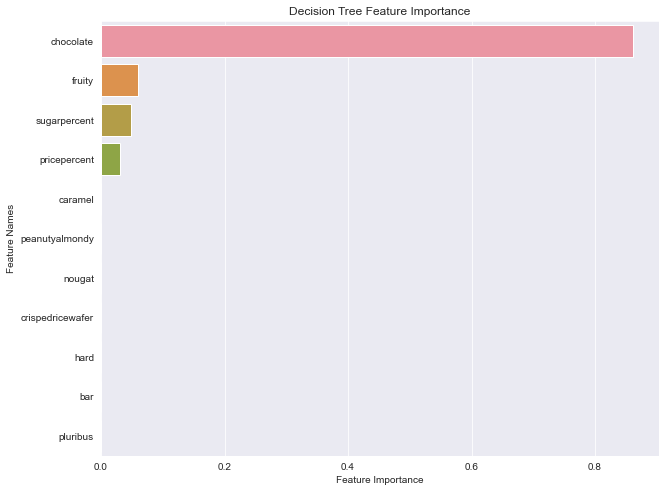

In [328]:
# Plot the feature importance
plot_feature_importance(dt_result.feature_importances_, names, 'Decision Tree ')

> ### Model 5: Random Forest

In [329]:
#-----------------------------------------------------------
# #Model 5 - Random Forest
#-----------------------------------------------------------

# Random Forest - train the model
rf = RandomForestRegressor(n_estimators=10, random_state=3)
rf_results = rf.fit(X_train, y_train)
# print(rf)

# Get the training set predictions
rf_Ypred_Train = rf_results.predict(X_train)

# Get the prediction
rf_Ypred = rf_results.predict(X_test)

# print actual vs prediction values
print('Predicted winpercent: ', np.round(rf_Ypred[:8],2))
print('Actual winpercent: ', np.round(y_test[:8],2))


Predicted winpercent:  [62.69 65.07 43.82 50.13 50.33 38.12 42.08 44.65]
Actual winpercent:  [65.72 60.8  55.35 57.22 47.17 39.01 22.45 41.39]


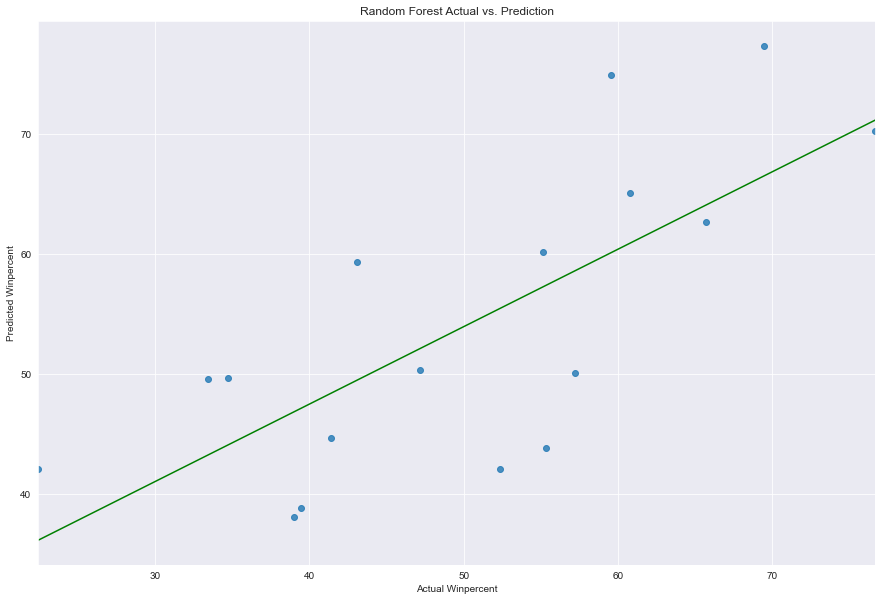

In [330]:
#compare using scatter plot
sns.regplot(x=y_test, y=rf_Ypred, ci=None, marker="o", line_kws={"color": "g", "linewidth" :1.5})
plt.xlabel('Actual Winpercent')
plt.ylabel('Predicted Winpercent')
plt.title('Random Forest Actual vs. Prediction')
plt.show()

In [331]:
#-----------------------
#compute metrics
#-----------------------
# MSE
mse_rf_train = MSE(y_train, rf_Ypred_Train)
mse_rf = MSE(y_test, rf_Ypred)

# RMSE
rsme_rf_train = np.sqrt(mse_rf_train)
rsme_rf = np.sqrt(mse_rf)
# R-Squared
R2_rf_train = r2_score(y_train, rf_Ypred_Train)
R2_rf = r2_score(y_test, rf_Ypred)

# Create a result table using pandas dataframe
metrics_rf = pd.DataFrame(columns=('Type', 'Train_Value', 'Test_value'))

# Adding metric values
metrics_rf.loc[0] = ['MSE', np.round(mse_rf_train,2), np.round(mse_rf,2)]
metrics_rf.loc[1] = ['RMSE', np.round(rsme_rf_train,2),np.round(rsme_rf,2)]
metrics_rf.loc[2] = ['R-Squared', np.round(R2_rf_train,2), np.round(R2_rf,2)]

# Print the results
print(tabulate(metrics_rf, headers=metrics_rf.columns, tablefmt="fancy_grid"))

╒════╤═══════════╤═══════════════╤══════════════╕
│    │ Type      │   Train_Value │   Test_value │
╞════╪═══════════╪═══════════════╪══════════════╡
│  0 │ MSE       │         33.45 │       108.19 │
├────┼───────────┼───────────────┼──────────────┤
│  1 │ RMSE      │          5.78 │        10.4  │
├────┼───────────┼───────────────┼──────────────┤
│  2 │ R-Squared │          0.85 │         0.44 │
╘════╧═══════════╧═══════════════╧══════════════╛


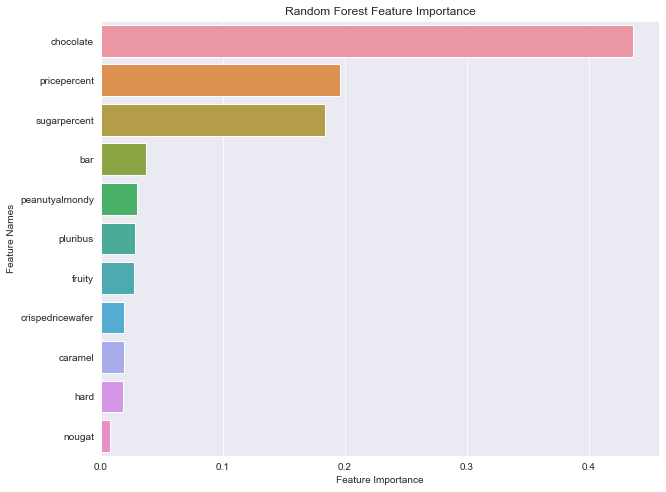

In [332]:
# Plot the feature importance
plot_feature_importance(rf_results.feature_importances_, names, 'Random Forest ')

> ### Model 6: Optimized Random Forest

In [333]:
#-----------------------------------------------------------
# Model 6 : Random Forest with optimized hyperparameters
#-----------------------------------------------------------

rf_hyper = RandomForestRegressor( random_state=3)
# gbr_result_rf_hyper = gbr.fit(X_train, y_train)

# try the following hyperparameter values
params_rf = {
    'bootstrap': [True],
    'max_depth': [20, 30, 40, 50],
    'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'min_samples_leaf': [3,4, 5,6],
    'min_samples_split': [3,5,8],
    'n_estimators': [40, 50, 60, 100,120]
}

# # try the following hyperparameter values
# params_rf = {
#     'bootstrap': [True],
#     'max_depth': [20],
#     'max_features': [10],
#     'min_samples_leaf': [5],
#     'min_samples_split': [3],
#     'n_estimators': [100]
# }

# Find the best hyperparameter combination to optimize the R2 metric
score_rf_hyper = make_scorer(r2_score)
gridsearch_rf = GridSearchCV(estimator=rf_hyper, param_grid= params_rf, scoring=score_rf_hyper, cv=3, n_jobs= -1)
gridsearch_rf.fit(X_train, y_train)
print("Best parameter combination:", gridsearch_rf.best_params_, "\n")

Best parameter combination: {'bootstrap': True, 'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 100} 



In [334]:
# Get the best model
rf_result_hyper = gridsearch_rf.best_estimator_

# Get the training set predictions
rf_hyper_Ypred_Train = rf_result_hyper.predict(X_train)

# Evaluate the model - Get the prediction
rf_hyper_Ypred = rf_result_hyper.predict(X_test)

# print actual vs prediction values
print('Predicted winpercent: ', np.round(rf_hyper_Ypred[:8],2))
print('Actual winpercent: ', np.round(y_test[:8],2))

Predicted winpercent:  [61.4  60.91 41.21 55.97 46.4  43.08 42.   44.26]
Actual winpercent:  [65.72 60.8  55.35 57.22 47.17 39.01 22.45 41.39]


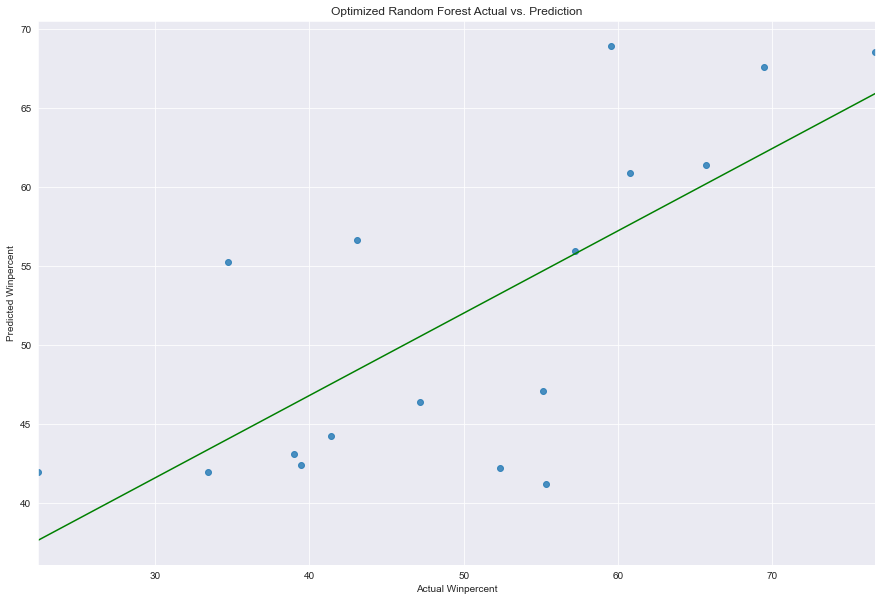

In [335]:
#compare using scatter plot
sns.regplot(x=y_test, y=rf_hyper_Ypred, ci=None, marker="o", line_kws={"color": "g", "linewidth" :1.5})
plt.xlabel('Actual Winpercent')
plt.ylabel('Predicted Winpercent')
plt.title('Optimized Random Forest Actual vs. Prediction')
plt.show()

In [336]:
#-----------------------
#compute metrics - Test
#-----------------------
# MSE
mse_rf_hyper_train = MSE(y_train, rf_hyper_Ypred_Train)
mse_rf_hyper = MSE(y_test, rf_hyper_Ypred)

# RMSE
rsme_rf_hyper_train = np.sqrt(mse_rf_hyper_train)
rsme_rf_hyper = np.sqrt(mse_rf_hyper)
# R-Squared
R2_rf_hyper_train = r2_score(y_train, rf_hyper_Ypred_Train)
R2_rf_hyper = r2_score(y_test, rf_hyper_Ypred)

# Create a result table using pandas dataframe
metrics_rf_hyper = pd.DataFrame(columns=('Type', 'Train_Value', 'Test_value'))

# Adding metric values
metrics_rf_hyper.loc[0] = ['MSE', np.round(mse_rf_hyper_train,2), np.round(mse_rf_hyper,2)]
metrics_rf_hyper.loc[1] = ['RMSE', np.round(rsme_rf_hyper_train,2),np.round(rsme_rf_hyper,2)]
metrics_rf_hyper.loc[2] = ['R-Squared', np.round(R2_rf_hyper_train,2), np.round(R2_rf_hyper,2)]

# Print the results
print(tabulate(metrics_rf_hyper, headers=metrics_rf_hyper.columns, tablefmt="fancy_grid"))

╒════╤═══════════╤═══════════════╤══════════════╕
│    │ Type      │   Train_Value │   Test_value │
╞════╪═══════════╪═══════════════╪══════════════╡
│  0 │ MSE       │         89.42 │        96.66 │
├────┼───────────┼───────────────┼──────────────┤
│  1 │ RMSE      │          9.46 │         9.83 │
├────┼───────────┼───────────────┼──────────────┤
│  2 │ R-Squared │          0.59 │         0.5  │
╘════╧═══════════╧═══════════════╧══════════════╛


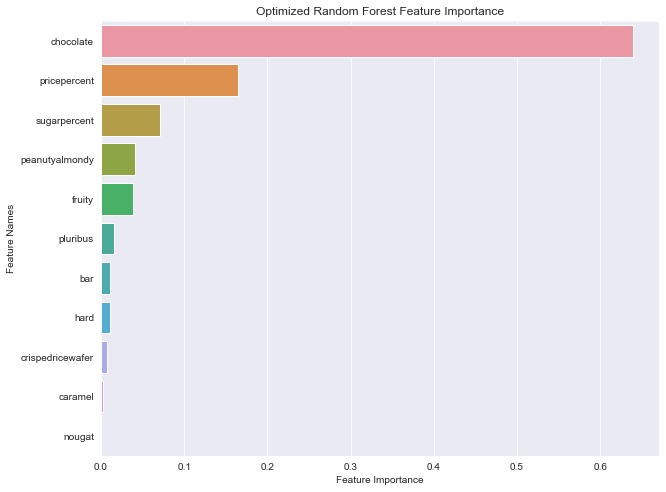

In [337]:
# Plot the feature importance
plot_feature_importance(rf_result_hyper.feature_importances_, names, 'Optimized Random Forest ')

> ### Model 7: Gradient Boosting

In [338]:
#-----------------------------------------------------------
# Model 7 : Gradient Boosting
#-----------------------------------------------------------

gbr = GradientBoostingRegressor()
gbr_result = gbr.fit(X_train, y_train)

# Get the training set predictions
gbr_Ypred_Train = gbr_result.predict(X_train)

# Get the prediction
gbr_Ypred = gbr_result.predict(X_test)

# print actual vs prediction values
print('Predicted winpercent: ', np.round(gbr_Ypred[:8],2))
print('Actual winpercent: ', np.round(y_test[:8],2))


Predicted winpercent:  [58.61 51.48 40.82 51.61 48.93 42.02 37.08 44.18]
Actual winpercent:  [65.72 60.8  55.35 57.22 47.17 39.01 22.45 41.39]


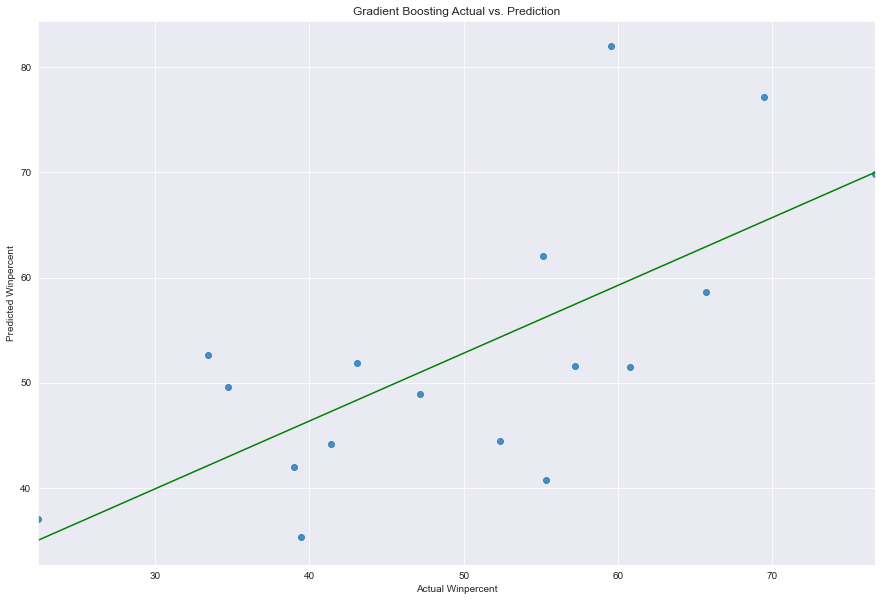

In [339]:
#compare using scatter plot
sns.regplot(x=y_test, y=gbr_Ypred, ci=None, marker="o", line_kws={"color": "g", "linewidth" :1.5})
plt.xlabel('Actual Winpercent')
plt.ylabel('Predicted Winpercent')
plt.title('Gradient Boosting Actual vs. Prediction')
plt.show()

In [340]:
#-----------------------
#compute metrics
#-----------------------
# MSE
mse_gbr_train = MSE(y_train, gbr_Ypred_Train)
mse_gbr = MSE(y_test, gbr_Ypred)

# RMSE
rsme_gbr_train = np.sqrt(mse_gbr_train)
rsme_gbr = np.sqrt(mse_gbr)

# R-Squared
R2_gbr_train = r2_score(y_train, gbr_Ypred_Train)
R2_gbr= r2_score(y_test, gbr_Ypred)

# Create a result table using pandas dataframe
metrics_gbr = pd.DataFrame(columns=('Type', 'Train_Value', 'Test_value'))


# Adding metric values
metrics_gbr.loc[0] = ['MSE', np.round(mse_gbr_train,2), np.round(mse_gbr,2)]
metrics_gbr.loc[1] = ['RMSE', np.round(rsme_gbr_train,2),np.round(rsme_gbr,2)]
metrics_gbr.loc[2] = ['R-Squared', np.round(R2_gbr_train,2), np.round(R2_gbr,2)]

# Print the results
print(tabulate(metrics_gbr, headers=metrics_gbr.columns, tablefmt="fancy_grid"))

╒════╤═══════════╤═══════════════╤══════════════╕
│    │ Type      │   Train_Value │   Test_value │
╞════╪═══════════╪═══════════════╪══════════════╡
│  0 │ MSE       │         13.99 │       118.93 │
├────┼───────────┼───────────────┼──────────────┤
│  1 │ RMSE      │          3.74 │        10.91 │
├────┼───────────┼───────────────┼──────────────┤
│  2 │ R-Squared │          0.94 │         0.38 │
╘════╧═══════════╧═══════════════╧══════════════╛


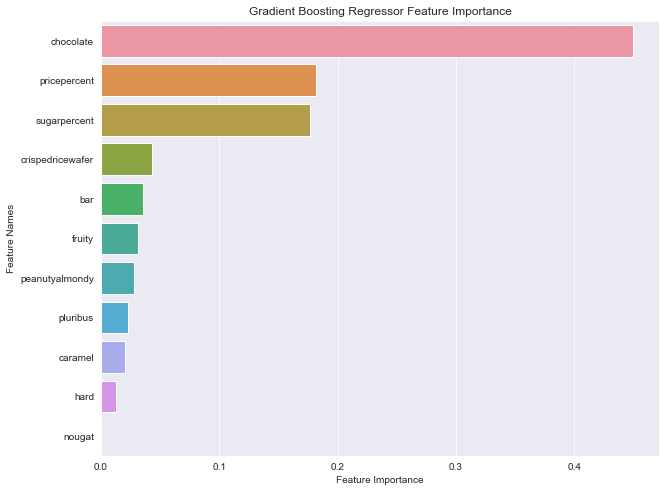

In [341]:
# Plot the feature importance
plot_feature_importance(gbr_result.feature_importances_, names, 'Gradient Boosting Regressor ')

> ### Model 8: Optimized Gradient Boosting

In [342]:
#-----------------------------------------------------------
# Model 8 : Boosting with optimized hyperparameters
#-----------------------------------------------------------

gbr = GradientBoostingRegressor( random_state=3)
# gbr_result = gbr.fit(X_train, y_train)

# # try the following hyperparameter values
# params_gbr = {
#     'loss': ['ls', 'lad', 'huber', 'quantile'],
#     'max_depth': [20, 30, 40, 50],
#     'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
#     'min_samples_leaf': [3,4, 5,6],
#     'min_samples_split': [2, 3,5,8],
#     'n_estimators': [40, 50, 60, 100,120]
# }

# # try the following hyperparameter values
# params_gbr = {
#     'loss': ['lad'],
#     'max_depth': [20],
#     'max_features': [8],
#     'min_samples_leaf': [ 5],
#     'min_samples_split': [2],
#     'n_estimators': [ 50]
# }

# Find the best hyperparameter combination to optimize the R2 metric
score_gbr_hyper = make_scorer(r2_score)
gridsearch_gbr = GridSearchCV(gbr, params_gbr, scoring=score_gbr_hyper, cv=3, n_jobs= -1)
gridsearch_gbr.fit(X_train, y_train)
print("Best parameter combination:", gridsearch_gbr.best_params_, "\n")

Best parameter combination: {'loss': 'lad', 'max_depth': 20, 'max_features': 8, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50} 



In [343]:
# Get the best model
gbr_result_hyper = gridsearch_gbr.best_estimator_

# Get the training set predictions
gbr_hyper_Ypred_Train = gbr_result_hyper.predict(X_train)

# Evaluate the model - Get the prediction
gbr_hyper_Ypred = gbr_result_hyper.predict(X_test)

# print actual vs prediction values
print('Predicted winpercent: ', np.round(gbr_hyper_Ypred[:8],2))
print('Actual winpercent: ', np.round(y_test[:8],2))

Predicted winpercent:  [57.72 59.65 42.84 53.88 49.18 44.29 40.02 45.45]
Actual winpercent:  [65.72 60.8  55.35 57.22 47.17 39.01 22.45 41.39]


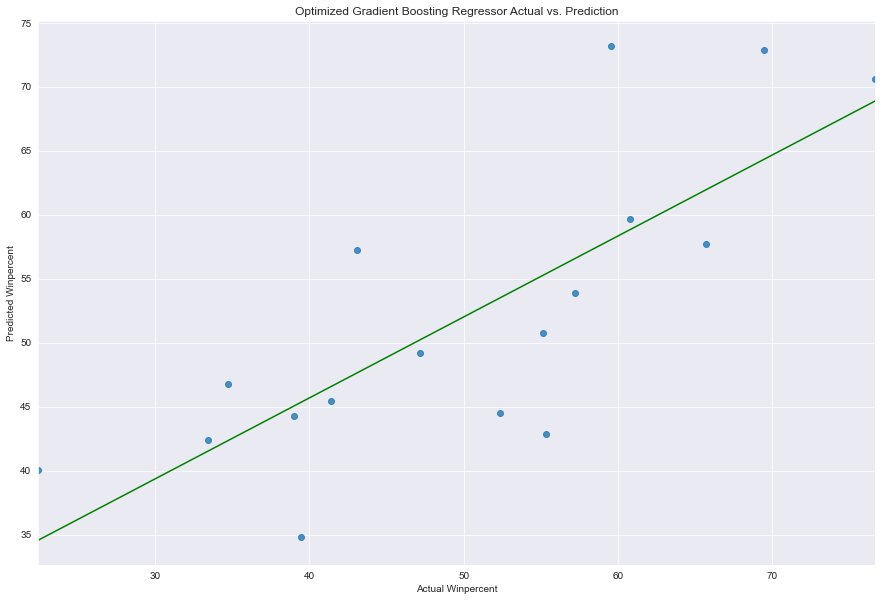

In [344]:
#compare using scatter plot
sns.regplot(x=y_test, y=gbr_hyper_Ypred, ci=None, marker="o", line_kws={"color": "g", "linewidth" :1.5})
plt.xlabel('Actual Winpercent')
plt.ylabel('Predicted Winpercent')
plt.title('Optimized Gradient Boosting Regressor Actual vs. Prediction')
plt.show()

In [345]:
#-----------------------
#compute metrics
#-----------------------
# MSE
mse_gbr_hyper_train = MSE(y_train, gbr_hyper_Ypred_Train)
mse_gbr_hyper = MSE(y_test, gbr_hyper_Ypred)

# RMSE
rsme_gbr_hyper_train = np.sqrt(mse_gbr_hyper_train)
rsme_gbr_hyper = np.sqrt(mse_gbr_hyper)

# R-Squared
R2_gbr_hyper_train = r2_score(y_train, gbr_hyper_Ypred_Train)
R2_gbr_hyper = r2_score(y_test, gbr_hyper_Ypred)

# Create a result table using pandas dataframe
metrics_gbr_hyper = pd.DataFrame(columns=('Type', 'Train_Value', 'Test_value'))

# Adding metric values
metrics_gbr_hyper.loc[0] = ['MSE', np.round(mse_gbr_hyper_train,2), np.round(mse_gbr_hyper,2)]
metrics_gbr_hyper.loc[1] = ['RMSE', np.round(rsme_gbr_hyper_train,2),np.round(rsme_gbr_hyper,2)]
metrics_gbr_hyper.loc[2] = ['R-Squared', np.round(R2_gbr_hyper_train,2), np.round(R2_gbr_hyper,2)]


# Print the results
print(tabulate(metrics_gbr_hyper, headers=metrics_gbr_hyper.columns, tablefmt="fancy_grid"))

╒════╤═══════════╤═══════════════╤══════════════╕
│    │ Type      │   Train_Value │   Test_value │
╞════╪═══════════╪═══════════════╪══════════════╡
│  0 │ MSE       │         51.85 │        79.59 │
├────┼───────────┼───────────────┼──────────────┤
│  1 │ RMSE      │          7.2  │         8.92 │
├────┼───────────┼───────────────┼──────────────┤
│  2 │ R-Squared │          0.76 │         0.59 │
╘════╧═══════════╧═══════════════╧══════════════╛


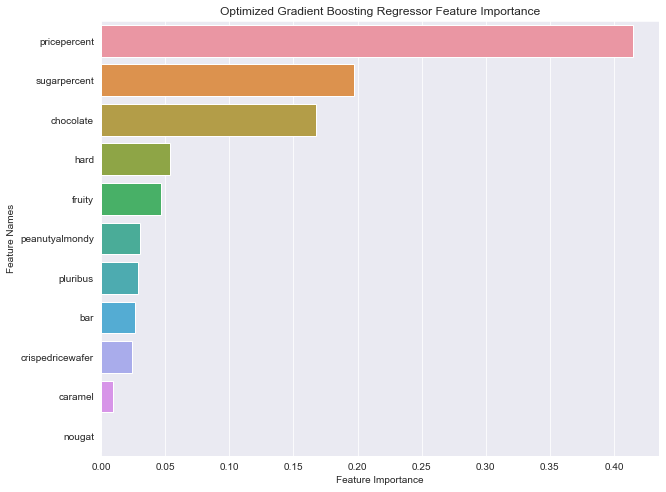

In [346]:
# Plot the feature importance
plot_feature_importance(gbr_result_hyper.feature_importances_, names, 'Optimized Gradient Boosting Regressor ')

> ### Model 9: Voting Regressor

In [347]:
#-----------------------------------------------------------
# Model 9 : Ensemble Learning (Voting Regressor) - Average prediction
#-----------------------------------------------------------
# Ridge Regression
ridge_vr = Ridge(alpha=0.1, normalize=True)

# Random Forest
rf_vr = RandomForestRegressor(bootstrap= True,
                           max_depth = 20,
                           max_features = 6,
                           min_samples_leaf= 5,
                           min_samples_split = 3,
                           n_estimators= 100,
                           random_state=3)
# Gradient Boosting
gbr_vr = GradientBoostingRegressor(loss ='lad',
                                   max_depth=20,
                                   max_features= 6,
                                   min_samples_leaf= 5,
                                   min_samples_split= 2,
                                   n_estimators= 50)
# Set the regressor parameter
regressor  = [('Ridge Regression', ridge_vr),
                ('Random Forest', rf_vr),
                ('Gradient Boosting', gbr_vr),]

# train the model
vr = VotingRegressor(estimators=regressor)
vr_result = vr.fit(X_train, y_train)

# Get the training set predictions
vr_Ypred_train = vr_result.predict(X_train)

# Evaluate the model - Get the prediction
vr_Ypred = vr_result.predict(X_test)

# print actual vs prediction values
print('Predicted winpercent: ', np.round(vr_Ypred[:8],2))
print('Actual winpercent: ', np.round(y_test[:8],2))


Predicted winpercent:  [58.37 59.64 41.86 54.88 46.84 41.17 42.4  44.96]
Actual winpercent:  [65.72 60.8  55.35 57.22 47.17 39.01 22.45 41.39]


In [348]:
#-----------------------
#compute metrics
#-----------------------
# MSE
mse_vr_train = MSE(y_train, vr_Ypred_train)
mse_vr = MSE(y_test, vr_Ypred)

# RMSE
rsme_vr_train = np.sqrt(mse_vr_train)
rsme_vr = np.sqrt(mse_vr)

# R-Squared
R2_vr_train = r2_score(y_train, vr_Ypred_train)
R2_vr = r2_score(y_test, vr_Ypred)

# Create a result table using pandas dataframe
metrics_vr = pd.DataFrame(columns=('Type', 'Train_Value', 'Test_value'))

# Adding metric values
metrics_vr.loc[0] = ['MSE', np.round(mse_vr_train,2), np.round(mse_vr,2)]
metrics_vr.loc[1] = ['RMSE', np.round(rsme_vr_train,2),np.round(rsme_vr,2)]
metrics_vr.loc[2] = ['R-Squared', np.round(R2_vr_train,2), np.round(R2_vr,2)]

# Print the results
print(tabulate(metrics_vr, headers=metrics_vr.columns, tablefmt="fancy_grid"))

╒════╤═══════════╤═══════════════╤══════════════╕
│    │ Type      │   Train_Value │   Test_value │
╞════╪═══════════╪═══════════════╪══════════════╡
│  0 │ MSE       │         75.25 │        94.47 │
├────┼───────────┼───────────────┼──────────────┤
│  1 │ RMSE      │          8.67 │         9.72 │
├────┼───────────┼───────────────┼──────────────┤
│  2 │ R-Squared │          0.66 │         0.51 │
╘════╧═══════════╧═══════════════╧══════════════╛


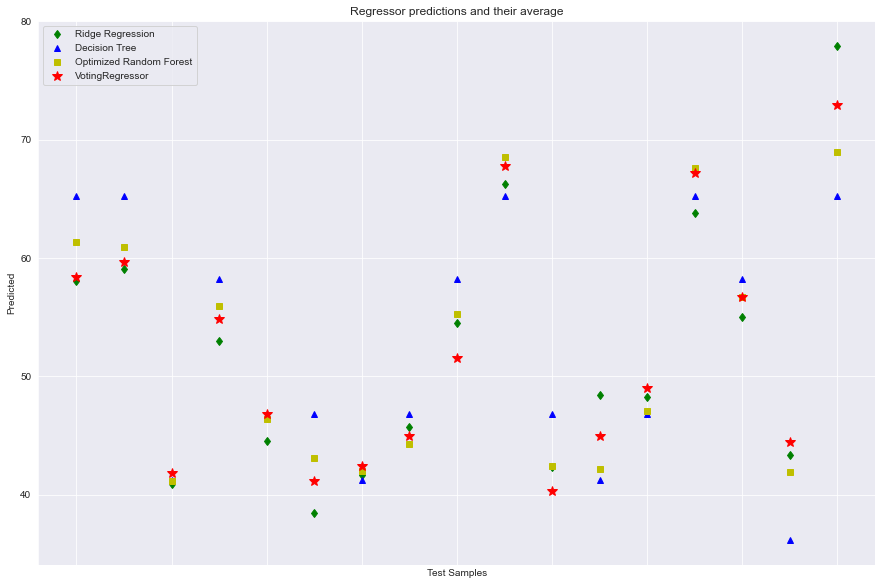

In [349]:
# Plot the results from VotingRegressor
plt.figure()
plt.plot(ridge_Ypred, 'gd', label='Ridge Regression')
plt.plot(dt_Ypred, 'b^', label='Decision Tree')
plt.plot(rf_hyper_Ypred, 'ys', label='Optimized Random Forest')
plt.plot(vr_Ypred, 'r*', ms=10, label='VotingRegressor')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('Predicted')
plt.xlabel('Test Samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')
plt.show()

## Model Comparison and Selection

In [360]:
# Rename column names
metrics_sm = metrics_sm.rename(columns={"Test_value": "Linear Regression" })
metrics_ridge = metrics_ridge.rename(columns={"Test_value": "Ridge Regression" })
metrics_lasso = metrics_lasso.rename(columns={"Test_value": "Lasso Regression" })
metrics_dt = metrics_dt.rename(columns={"Test_value": "Decision Tree" })
metrics_rf = metrics_rf.rename(columns={"Test_value": "Random Forest" })
metrics_rf_hyper = metrics_rf_hyper.rename(columns={"Test_value": "Optimized Random Forest" })
metrics_gbr = metrics_gbr.rename(columns={"Test_value": "Gradient Boosting" })
metrics_gbr_hyper = metrics_gbr_hyper.rename(columns={"Test_value": "Optimized Gradient Boosting" })

# final_metrics = pd.concat([#metrics_sm.loc[:,["Type","Linear Regression"]],
#                            metrics_ridge.loc[:,["Type","Linear Regression"]],                       
#                            #metrics_lasso.iloc[:,2:3],
#                            metrics_dt.iloc[:,2:3],
#                            #metrics_rf.iloc[:,2:3],
#                            metrics_rf_hyper.iloc[:,2:3],
#                            #metrics_gbr.iloc[:,2:3],
#                            #metrics_gbr_hyper.iloc[:,2:3]],
#                         axis=1)

final_metrics = pd.concat([metrics_ridge.loc[:,["Type","Ridge Regression"]],                       
                           metrics_dt.iloc[:,2:3],
                           metrics_rf_hyper.iloc[:,2:3]],
                           axis=1)


In [372]:
# Print the results
print(tabulate(final_metrics, headers=final_metrics.columns, tablefmt="fancy_grid"))
# final_metrics

╒════╤═══════════╤════════════════════╤═════════════════╤═══════════════════════════╕
│    │ Type      │   Ridge Regression │   Decision Tree │   Optimized Random Forest │
╞════╪═══════════╪════════════════════╪═════════════════╪═══════════════════════════╡
│  0 │ MSE       │             109.6  │          110.49 │                     96.66 │
├────┼───────────┼────────────────────┼─────────────────┼───────────────────────────┤
│  1 │ RMSE      │              10.47 │           10.51 │                      9.83 │
├────┼───────────┼────────────────────┼─────────────────┼───────────────────────────┤
│  2 │ R-Squared │               0.43 │            0.43 │                      0.5  │
╘════╧═══════════╧════════════════════╧═════════════════╧═══════════════════════════╛


Based on our analysis, Optimized Random Forest would be our final model.

## Conclusion

Based on our findings and final model, we would recommend the following product characteristics for the new product. It should contain the following:
- Chocolate
- Sugar
- Peanuts, peanut butter, or almonds

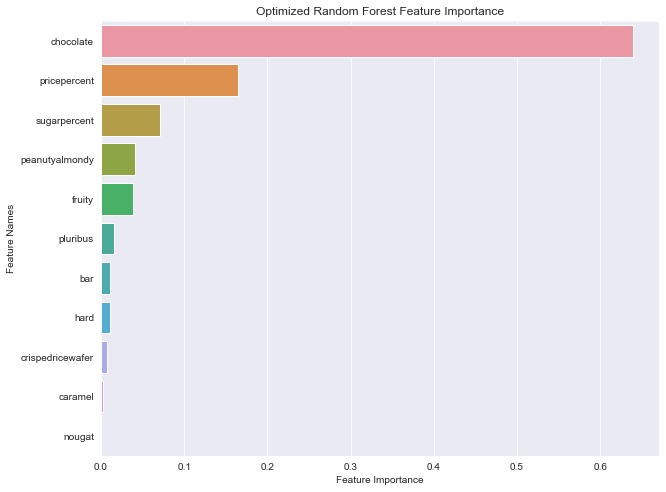

In [373]:
# Plot the feature importance
plot_feature_importance(rf_result_hyper.feature_importances_, names, 'Optimized Random Forest ')